In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import matplotlib
import re
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Bengaluru_House_Data.csv')

In [3]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
data.shape

(13320, 9)

In [6]:
data.area_type.value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [7]:
#Assuming this data are not importnt so droping them
data = data.drop(['society' , 'availability'] , axis = 1) 

In [8]:
data.isna().sum()

area_type       0
location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [9]:
data = data.fillna(data.mean().round())

In [10]:
data = data.dropna()

In [11]:
data['bhk'] = data['size'].apply(lambda x: int(x.split(' ')[0]))

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13303 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   13303 non-null  object 
 1   location    13303 non-null  object 
 2   size        13303 non-null  object 
 3   total_sqft  13303 non-null  object 
 4   bath        13303 non-null  float64
 5   balcony     13303 non-null  float64
 6   price       13303 non-null  float64
 7   bhk         13303 non-null  int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 935.4+ KB


In [13]:
data.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [14]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [15]:
data[~data['total_sqft'].apply(is_float)].head(10)

,area_type,location,size,total_sqft,bath,balcony,price,bhk
30,Super built-up Area,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
56,Built-up Area,Devanahalli,4 Bedroom,3010 - 3410,3.0,2.0,192.000,4
81,Built-up Area,Hennur Road,4 Bedroom,2957 - 3450,3.0,2.0,224.500,4
122,Super built-up Area,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,Super built-up Area,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Super built-up Area,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,Super built-up Area,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2
224,Super built-up Area,Devanahalli,3 BHK,1520 - 1740,3.0,2.0,74.820,3
410,Super built-up Area,Kengeri,1 BHK,34.46Sq. Meter,1.0,0.0,18.500,1
549,Super built-up Area,Hennur Road,2 BHK,1195 - 1440,2.0,0.0,63.770,2


In [16]:
#Converting Range of square fit into single number
def convt_sqft_to_num(x):
    token = x.split('-')
    if len(token) == 2:
        return(float(token[0])+float(token[1]))/2  # return avg of the range data
    try:
        return float(x)         # return data as it is if data is not in range
    except:
        return None        # return Nothing if data is in form of 36.4sq.meter

In [17]:
Data = data.copy()

In [18]:
data['total_sqft'] = data['total_sqft'].apply(convt_sqft_to_num)
data = data.dropna()

In [19]:
data['price_per_sqft'] = data['price']*100000/data['total_sqft']

In [20]:
data.location = data.location.apply(lambda x : x.strip())
data.location.value_counts()

Whitefield                   538
Sarjapur  Road               397
Electronic City              304
Kanakpura Road               271
Thanisandra                  236
                            ... 
Nagarbhavi  BDA Complex        1
Rajanna Layout                 1
1 Ramamurthy Nagar             1
Lakshmipura Vidyaanyapura      1
Abshot Layout                  1
Name: location, Length: 1287, dtype: int64

In [21]:
len(data.location.value_counts()[data.location.value_counts() <=10]) # to check location less than 10 data point

1047

In [22]:
location_less_than_10 = data.location.value_counts()[data.location.value_counts() <=10]
location_less_than_10

Sadashiva Nagar              10
BTM 1st Stage                10
Nagadevanahalli              10
Sector 1 HSR Layout          10
Basapura                     10
                             ..
Nagarbhavi  BDA Complex       1
Rajanna Layout                1
1 Ramamurthy Nagar            1
Lakshmipura Vidyaanyapura     1
Abshot Layout                 1
Name: location, Length: 1047, dtype: int64

In [23]:
data.location.nunique()

1287

In [24]:
data.area_type = data.area_type.replace(r'\s+', ' ', regex=True)

In [25]:
data.location = data.location.apply(lambda x : 'others' if x in location_less_than_10 else x )

In [26]:
data.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [27]:
data['sqft'] = data['total_sqft']/data['bhk']

In [28]:
data[data['sqft']<300].head(10)

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft,sqft
9,Plot Area,others,6 Bedroom,1020.0,6.0,2.0,370.0,6,36274.509804,170.000000
45,Plot Area,HSR Layout,8 Bedroom,600.0,9.0,2.0,200.0,8,33333.333333,75.000000
58,Plot Area,Murugeshpalya,6 Bedroom,1407.0,4.0,1.0,150.0,6,10660.980810,234.500000
68,Plot Area,Devarachikkanahalli,8 Bedroom,1350.0,7.0,0.0,85.0,8,6296.296296,168.750000
70,Plot Area,others,3 Bedroom,500.0,3.0,2.0,100.0,3,20000.000000,166.666667
78,Built-up Area,Kaval Byrasandra,2 BHK,460.0,1.0,0.0,22.0,2,4782.608696,230.000000
89,Plot Area,Rajaji Nagar,6 Bedroom,710.0,6.0,3.0,160.0,6,22535.211268,118.333333
119,Plot Area,Hennur Road,2 Bedroom,276.0,3.0,3.0,23.0,2,8333.333333,138.000000
129,Plot Area,Vishwapriya Layout,7 Bedroom,950.0,7.0,0.0,115.0,7,12105.263158,135.714286
149,Plot Area,others,6 Bedroom,1034.0,5.0,2.0,185.0,6,17891.682785,172.333333


In [29]:
data.shape

(13257, 10)

In [30]:
data = data[~(data['sqft']<300)]

In [31]:
data.shape

(12513, 10)

In [32]:
data.price_per_sqft.describe()

count     12513.000000
mean       6307.441644
std        4160.931610
min         267.829813
25%        4210.526316
50%        5295.007564
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

* In City like Bangluru the price per square fit having 267 and 176470 are very rare so we need to remove such outliers

In [33]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby('location'):
        mean = np.mean(subdf.price_per_sqft)
        std_dev = np.std(subdf.price_per_sqft)
        reduce = subdf[(subdf.price_per_sqft > (mean - std_dev)) & (subdf.price_per_sqft <= (mean + std_dev))]
        df_out = pd.concat([df_out,reduce] , ignore_index= True)
    return df_out

In [34]:
data = remove_pps_outliers(data)  # outliers are removed
data.shape

(10288, 10)

In [35]:
data['size'].unique()

array(['4 BHK', '3 BHK', '2 BHK', '5 Bedroom', '2 Bedroom', '1 BHK',
       '4 Bedroom', '6 Bedroom', '6 BHK', '5 BHK', '3 Bedroom',
       '1 Bedroom', '8 Bedroom', '1 RK', '7 Bedroom', '9 BHK', '7 BHK',
       '10 BHK', '9 Bedroom', '11 BHK', '16 BHK', '8 BHK', '10 Bedroom',
       '13 BHK'], dtype=object)

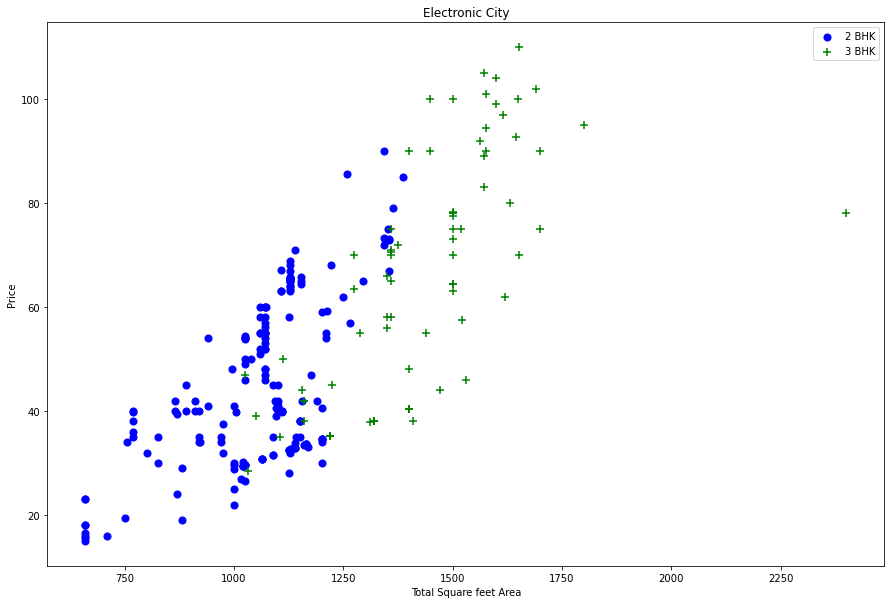

In [36]:
def plot_scatter_chart(df,location):
    
    bhk2 = df[(df.location==location) & (df.bhk == 2)]
    bhk3 = df[(df.location==location) & (df.bhk == 3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price , color = 'blue' , label = '2 BHK' , s = 50)
    plt.scatter(bhk3.total_sqft,bhk3.price ,marker ='+' , color = 'green' , label = '3 BHK' , s = 50)
    plt.xlabel('Total Square feet Area')
    plt.ylabel('Price')
    plt.title(location)
    plt.legend()

plot_scatter_chart(data,"Electronic City")   

In [37]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location , location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk,bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'Mean' : np.mean(bhk_df.price_per_sqft),
                'Std_Dev' : np.std(bhk_df.price_per_sqft),
                'Count' : bhk_df.shape[0]
            }
        for bhk , bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['Count']>5:
                exclude_indices = np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft < (stats['Mean'])].index.values)
    return df.drop(exclude_indices , axis = 'index')

data = remove_bhk_outliers(data)
data.shape

(7342, 10)

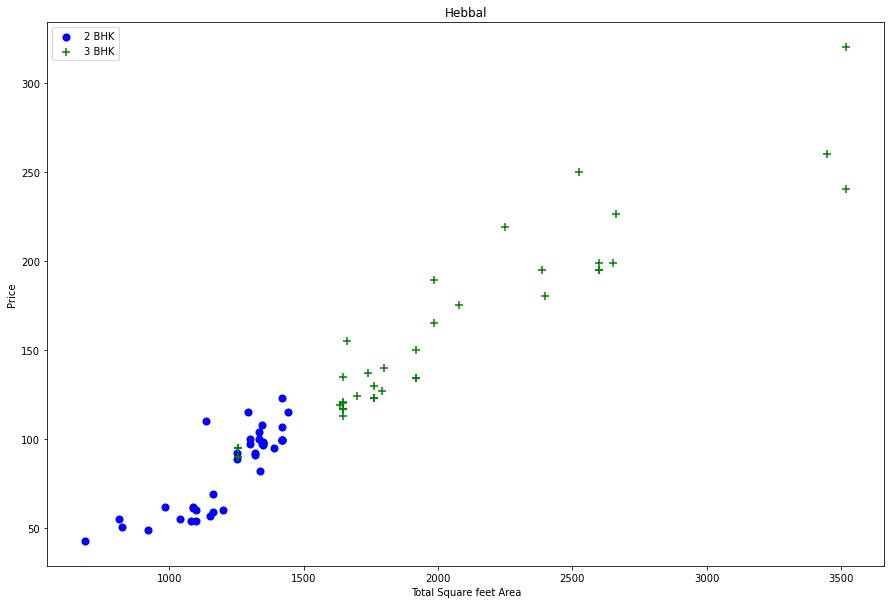

In [38]:
plot_scatter_chart(data,"Hebbal") 

Text(0, 0.5, 'Count')

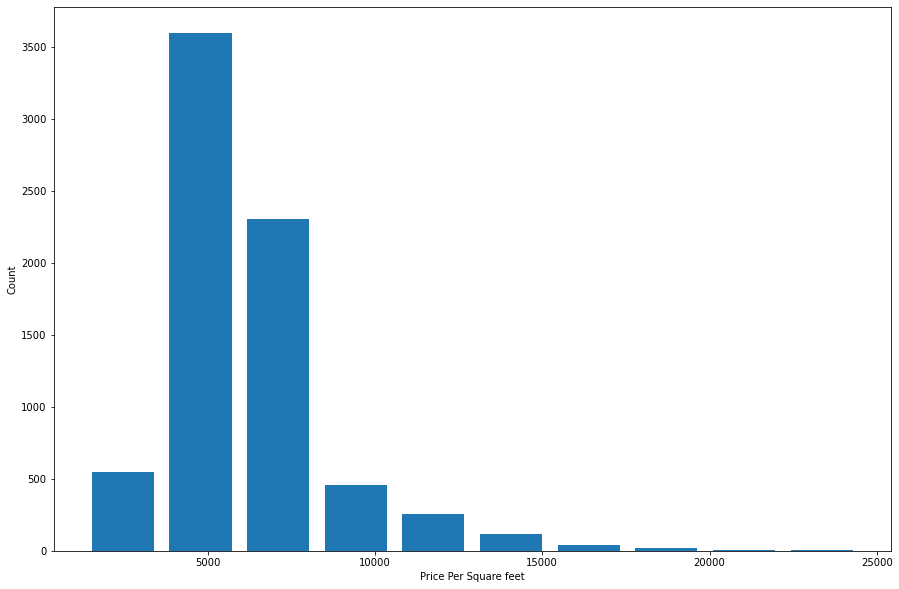

In [39]:
plt.rcParams['figure.figsize'] = (15,10)
plt.hist(data.price_per_sqft , rwidth= 0.8)
plt.xlabel("Price Per Square feet")
plt.ylabel("Count")

In [40]:
data.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

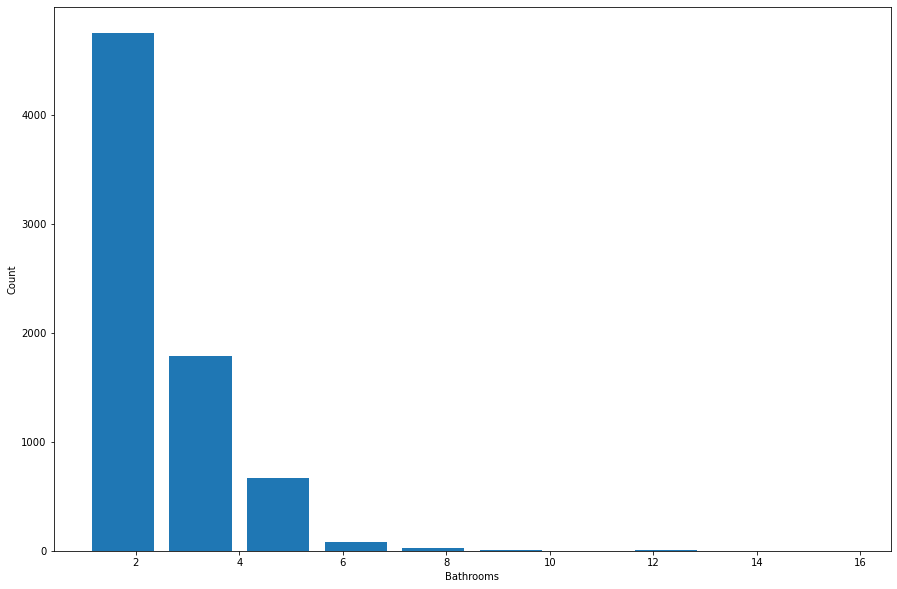

In [41]:
plt.rcParams['figure.figsize'] = (15,10)
plt.hist(data.bath , rwidth= 0.8)
plt.xlabel("Bathrooms")
plt.ylabel("Count")

In [42]:
data[data.bath>10]

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft,sqft
5306,Super built-up Area,Neeladri Nagar,10 BHK,4000.0,12.0,2.0,160.0,10,4000.000000,400.000000
8527,Super built-up Area,others,10 BHK,12000.0,12.0,2.0,525.0,10,4375.000000,1200.000000
8616,Super built-up Area,others,16 BHK,10000.0,16.0,2.0,550.0,16,5500.000000,625.000000
9351,Super built-up Area,others,11 BHK,6000.0,12.0,2.0,150.0,11,2500.000000,545.454545
9682,Super built-up Area,others,13 BHK,5425.0,13.0,0.0,275.0,13,5069.124424,417.307692


In [43]:
data[data.bath<data.bath+2]

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft,sqft
0,Super built-up Area,1st Block Jayanagar,4 BHK,2850.0,4.0,1.0,428.0,4,15017.543860,712.500000
1,Super built-up Area,1st Block Jayanagar,3 BHK,1630.0,3.0,2.0,194.0,3,11901.840491,543.333333
2,Super built-up Area,1st Block Jayanagar,3 BHK,1875.0,2.0,3.0,235.0,3,12533.333333,625.000000
3,Built-up Area,1st Block Jayanagar,3 BHK,1200.0,2.0,0.0,130.0,3,10833.333333,400.000000
4,Super built-up Area,1st Block Jayanagar,2 BHK,1235.0,2.0,2.0,148.0,2,11983.805668,617.500000
...,...,...,...,...,...,...,...,...,...,...
10279,Carpet Area,others,2 BHK,1200.0,2.0,3.0,70.0,2,5833.333333,600.000000
10280,Super built-up Area,others,1 BHK,1800.0,1.0,1.0,200.0,1,11111.111111,1800.000000
10283,Super built-up Area,others,2 BHK,1353.0,2.0,2.0,110.0,2,8130.081301,676.500000
10284,Plot Area,others,1 Bedroom,812.0,1.0,0.0,26.0,1,3201.970443,812.000000


In [44]:
data = data.drop(['size' , 'price_per_sqft' , 'sqft'] , axis = 1)

In [45]:
dummies_location = pd.get_dummies(data.location,drop_first = True)
dummies_area = pd.get_dummies(data.area_type,drop_first=True)

In [46]:
data = pd.concat([data,dummies_location,dummies_area] , axis = 'columns')
data.head()

,area_type,location,total_sqft,bath,balcony,price,bhk,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,others,Carpet Area,Plot Area,Super built-up Area
0,Super built-up Area,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,Super built-up Area,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,Super built-up Area,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Built-up Area,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Super built-up Area,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [47]:
data = data.drop(['location' , 'area_type'] , axis = 'columns')

In [48]:
data.head()

,total_sqft,bath,balcony,price,bhk,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,others,Carpet Area,Plot Area,Super built-up Area
0,2850.0,4.0,1.0,428.0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1630.0,3.0,2.0,194.0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1875.0,2.0,3.0,235.0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1200.0,2.0,0.0,130.0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2.0,148.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [49]:
feature = data.drop('price' , axis = 1 )
target = data['price']

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(feature,target , test_size = 0.2 , random_state=10)

In [51]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(x_train,y_train)
lr_clf.score(x_test,y_test)

0.8639858209249784

In [52]:
from sklearn.model_selection import ShuffleSplit,cross_val_score
cv = ShuffleSplit(n_splits = 5 , test_size = 0.2 , random_state = 0)
cross_val_score(LinearRegression(),feature,target,cv = cv)

array([0.82778203, 0.87658724, 0.88940749, 0.84086477, 0.80518004])

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_my_best_model(X,y):
    algos = {
        'linear_regression' : {
            'model' : LinearRegression(),
            'params' : {
                'normalize' : [True,False]
            }
        },
        'lasso' : {
            'model' : Lasso(),
            'params' : {
                'alpha' : [1,2],
                'selection' : ['random' , 'cyclic']
            }
        },
        'decision_tree' : {
            'model' : DecisionTreeRegressor(),
            'params' : {
                'criterion' : ['mse' , 'friedman_mse'],
                'splitter' : ['best' , 'random']
            }
        }
    }
    
    score = []
    cv = ShuffleSplit(n_splits = 5 , test_size= 0.2 , random_state= 0)
    for algo_name , config in algos.items():
        gs = GridSearchCV(config['model'] , config['params'] , cv = cv , return_train_score= False)
        gs.fit(X,y)
        score.append({
            'model' : algo_name,
            'best_score' : gs.best_score_,
            'best_params' : gs.best_params_
        })
        
    return pd.DataFrame(score , columns=['model' , 'best_score' , 'best_params'])

find_my_best_model(feature,target)

,model,best_score,best_params
0,linear_regression,0.847964,{'normalize': True}
1,lasso,0.706759,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.700714,"{'criterion': 'mse', 'splitter': 'random'}"


In [54]:
feature.columns

Index(['total_sqft', 'bath', 'balcony', 'bhk', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar', '6th Phase JP Nagar',
       ...
       'Whitefield', 'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town',
       'Yelenahalli', 'Yeshwanthpur', 'others', 'Carpet Area', 'Plot Area',
       'Super built-up Area'],
      dtype='object', length=247)

In [55]:
def predict_preict(location,sqft,bath,balcony,bhk,area_type):
    loc_index = np.where(feature.columns==location)[0][0]
    area_index = np.where(feature.columns==area_type)[0][0]
    
    x = np.zeros(len(feature.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    x[3] = balcony
    if loc_index >= 0 :
        x[loc_index] = 1
    if area_index >= 0 :
        x[area_index] = 1
        
    return lr_clf.predict([x])[0]

In [57]:
predict_preict('1st Phase JP Nagar', 2850 , 2 , 1 ,2,'Carpet Area')

236.26305229030032

In [61]:
predict_preict('1st Phase JP Nagar', 2850 , 2 , 1 ,2,'Plot Area')

246.17879457649158

In [58]:
predict_preict('Indira Nagar', 1000 , 5 , 2,3 ,'Plot Area')

201.2906326079048

In [62]:
predict_preict('Indira Nagar', 1000 , 5 , 2,3 ,'Carpet Area')

191.37489032171362

In [59]:
import pickle
with open('banglore_home_price_model.pickle' , 'wb') as f:
    pickle.dump(lr_clf,f)

In [60]:
import json
columns = {
    'data_columns' : [col.lower() for col in feature.columns]
}
with open("columns.json" , "w") as f:
    f.write(json.dumps(columns))